# Lesson 2: Balance of Linear Momentum

<b>Tags:</b> #continuummechanics #elasticity #linearmomentum<br>
<b>Author:</b> Syed Talha Tirmizi <br>
<b>Last update:</b> 2025-12-22 (Created 2021-12-22) <br>

## Description

In this lesson, we apply the **Balance of Linear Momentum** to a classical 1D problem. We are provided with an elastic rod hanging from a ceiling, deforming under its own weight due to gravity. <br>

We will:

1. Derive the govering Odinary Differential Equation (ODE) from the general strong form.
2. Solve the ODE analytically to find the exact displacement field $\mathbf{u}(x)$.

The rod is L units long with cross sectional area A. It has Young's Modulus E and mass density $\rho$. The gravity is acting on it with acceleration due to gravity **g**. 

The coordinate x runs downwards from the ceiling (x = 0) to the free tip (x = L).

### Governing Equations

We start with the local form of linear momentum balance (Assuming static case where a = 0),

$
\begin{align}
\nabla \cdot \mathbf{\sigma} + \mathbf{b} \rho = 0 
\end{align}
$

Since the gravity is only acting in the positive x-direction (b = g), 

$
\begin{align}
\frac{d \mathbf{\sigma}}{dx} + \mathbf{g} \rho = 0 
\end{align}
$ 

Using Hooke's Law,

$
\begin{align}
\sigma = \textit{E} \varepsilon 
\end{align}
$

and definition of small strain

$
\begin{align}
\varepsilon = \frac{du}{dx}
\end{align}
$

Substitute (3) and (4) into the balance equation,
$
\begin{align}
\frac{d}{dx} \left( E \frac{du}{dx} \right) + \rho g = 0
\end{align}
$

Assuming $\textit{E}$ is constant,
$
\begin{align}
E \frac{d}{dx} \left(\frac{du}{dx} \right) = - \rho g
\end{align}
$

$
\begin{align}
u^{''}(x) = - \frac{\rho g}{E}
\end{align}
$

### Analytical Solution

We integrate twice with respect to x:

$
\begin{align}
u^{'}(x) = - \frac{\rho g}{\textit{E}} x + c_1
\end{align}
$

$
\begin{align}
u(x) = - \frac{\rho g}{2\textit{E}} x^{2} + c_1 x + c_2
\end{align}
$
<br>
To find the constants c_1 and c_2, we apply Boundary Conditions (BCs):
<br>

**BC 1 (Dirichlet):**<br>
Fixed at the top (x=0):
<br>
$ u(0) = 0 \implies c_2 = 0 $
<br>
**BC 2 (Neumann):**<br>
Free at the bottom (x=L). The stress (and thus strain) must be zero at the free tip.
<br>
$\sigma(L) = \textit{E} u^{'}(L)=0$
<br>
$- \frac{\rho g}{\textit{E}} L + c_1 = 0 \implies c_1 = \frac{\rho g L}{\textit{E}}$
<br>

Substituting these into the Exact Solution:
$
\begin{align}
u(x) = \frac{\rho g}{E} \left( Lx - \frac{x^2}{2} \right)
\end{align}
$

and the Strain Field:
$
\begin{align}
\varepsilon(x)= u^{'}(x) = \frac{\rho g}{\textit{E}} (L-x)
\end{align}
$

## Setup

In [ ]:
import numpy as np                                 # Numerical operations
import matplotlib.pyplot as plt                    # Plotting library
import matplotlib.patches as patches               # For drawing shapes
from matplotlib.collections import PatchCollection # For collections of shapes
import warnings                                    # Warning control
warnings.filterwarnings("ignore")                  # no warnings

## Properties

In [2]:
# Material properties
L = 10.0       # Length [m]
E = 200e9      # Young's Modulus [Pa]
rho = 7850.0   # Density [kg/m^3]
g = 9.81       # Gravity [m/s^2]

# Define Domain
x_domain = np.linspace(0, L, 100)  # Domain from 0 to L

## Analytical Functions

In [3]:
def displacement_analytical(x, L, E, rho, g):
    """
    Exact solution derived from integrating the ODE.
    u(x) = (rho*g/E) * (Lx - 0.5*x^2)
    """
    return (rho * g / E) * (L * x - 0.5 * x**2)

def strain_analytical(x, L, E, rho, g):
    """
    Exact strain derived from differentiating displacement.
    epsilon(x) = (rho*g/E) * (L - x)
    """
    return (rho * g / E) * (L - x)

In [7]:
# Compute Exact Solutions
u_exact = displacement_analytical(x_domain, L, E, rho, g)
eps_exact = strain_analytical(x_domain, L, E, rho, g)

# Output Key Results
u_max = u_exact[-1]  # Displacement at tip (x=L)
eps_max = eps_exact[0] # Strain at top (x=0)

# Print Results
print(f"Total Elongation (Delta L): {u_max:.3e} m")
print(f"Maximum Strain (at root):   {eps_max:.3e}")

Total Elongation (Delta L): 1.925e-05 m
Maximum Strain (at root):   3.850e-06


## Visualizations

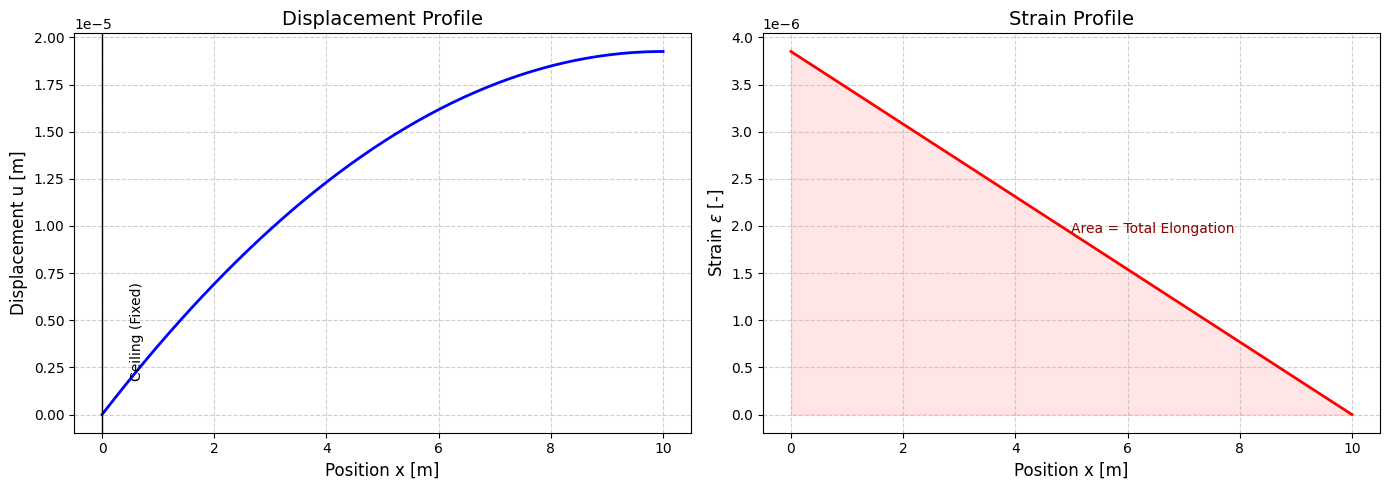

In [13]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Displacement u(x)
ax[0].plot(x_domain, u_exact, label='Analytical u(x)', color='blue', linewidth=2)
ax[0].set_title("Displacement Profile", fontsize=14)
ax[0].set_xlabel("Position x [m]", fontsize=12)
ax[0].set_ylabel("Displacement u [m]", fontsize=12)
ax[0].grid(True, linestyle='--', alpha=0.6)
ax[0].axvline(0, color='black', linewidth=1) # Ceiling
ax[0].text(0.5, u_max*0.1, 'Ceiling (Fixed)', rotation=90)

# Strain epsilon(x) 
ax[1].plot(x_domain, eps_exact, label='Analytical Strain', color='red', linewidth=2)
ax[1].set_title("Strain Profile", fontsize=14)
ax[1].set_xlabel("Position x [m]", fontsize=12)
ax[1].set_ylabel("Strain $\epsilon$ [-]", fontsize=12)
ax[1].grid(True, linestyle='--', alpha=0.6)

# Fill area under curve to visualize "total elongation" integral
ax[1].fill_between(x_domain, eps_exact, color='red', alpha=0.1)
ax[1].text(L/2, eps_max/2, 'Area = Total Elongation', fontsize=10, color='darkred')

plt.tight_layout()
plt.show()

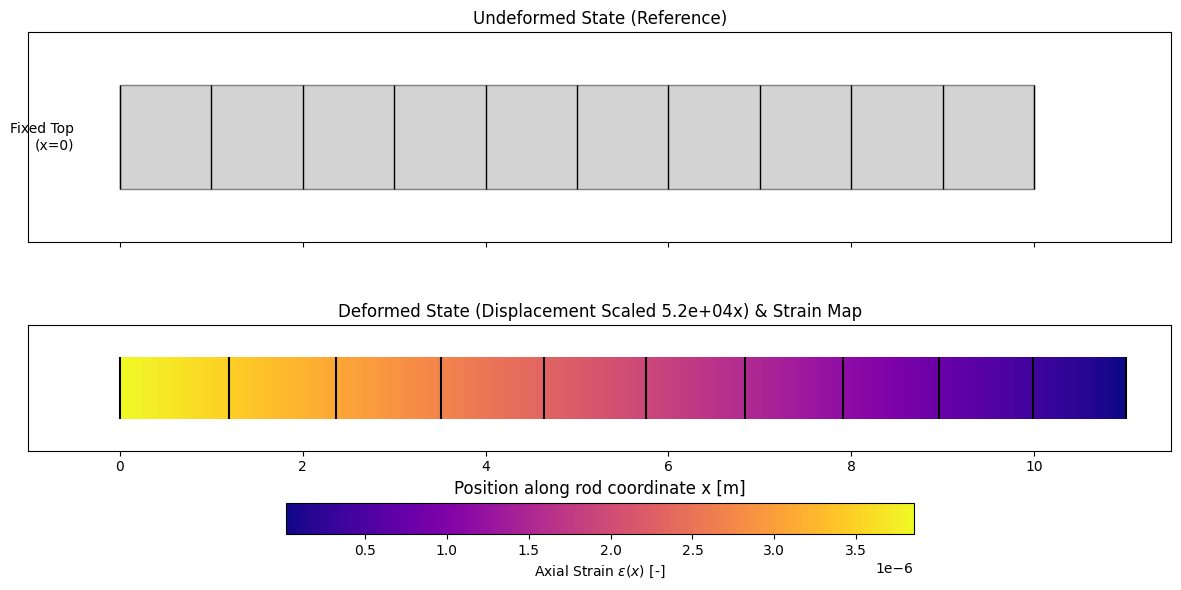

In [17]:
# Scaling factor: Real displacements are tiny. Scale up to 10% of L for visibility.
scale_factor = 0.1 * L / np.max(u_exact)
u_scaled = u_exact * scale_factor
x_deformed = x_domain + u_scaled

# Define bar geometry for plotting
bar_height = 1.0
y_center_undeformed = 2.0
y_center_deformed = 0.0

fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Undeformed State 
# Draw the main bar body
undeformed_bar = patches.Rectangle((0, y_center_undeformed - bar_height/2), L, bar_height,
                                     facecolor='lightgray', edgecolor='gray')
ax[0].add_patch(undeformed_bar)

# Add markers to show initial spacing
marker_x = np.linspace(0, L, 11)
for mx in marker_x:
    ax[0].vlines(mx, y_center_undeformed - bar_height/2, y_center_undeformed + bar_height/2,
                 colors='black', linestyles='-', linewidth=1)

# Annotations
ax[0].set_title("Undeformed State (Reference)", fontsize=12)
ax[0].text(-0.5, y_center_undeformed, "Fixed Top\n(x=0)", ha='right', va='center')
ax[0].set_yticks([])
ax[0].set_xlim(-1, L * 1.15) # Make room for expansion
ax[0].set_ylim(y_center_undeformed - bar_height, y_center_undeformed + bar_height)


# Deformed State
rects = []
for i in range(len(x_domain) - 1):
    # Start and end X coordinates of the current deformed segment
    x_start = x_deformed[i]
    width = x_deformed[i+1] - x_deformed[i]
    
    rect = patches.Rectangle((x_start, y_center_deformed - bar_height/2), width, bar_height)
    rects.append(rect)

# Create the collection and map strain values to colors
pc = PatchCollection(rects, cmap='plasma', edgecolor='none')
# Use strain values (excluding last point to match rect count) for coloring
pc.set_array(eps_exact[:-1]) 
ax[1].add_collection(pc)

# Add markers showing deformed spacing
for mx in marker_x:
    # Calculate deformed position of markers
    u_marker = (rho * g / E) * (L * mx - 0.5 * mx**2)
    mx_def = mx + u_marker * scale_factor
    ax[1].vlines(mx_def, y_center_deformed - bar_height/2, y_center_deformed + bar_height/2,
                 colors='black', linestyles='-', linewidth=1.5)

# Annotations
ax[1].set_title(f"Deformed State (Displacement Scaled {scale_factor:.1e}x) & Strain Map", fontsize=12)
ax[1].set_xlabel("Position along rod coordinate x [m]", fontsize=12)
ax[1].set_yticks([])
ax[1].set_ylim(y_center_deformed - bar_height, y_center_deformed + bar_height)

# Add Colorbar for Strain
cbar = plt.colorbar(pc, ax=ax[1], orientation='horizontal', pad=0.25)
cbar.set_label('Axial Strain $\epsilon(x)$ [-]', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4) # Add space between subplots
plt.show()

**Note:**

As shown in our Strain Profile plot and derived in the equations, the strain ε(x) is not uniform. It is maximum at the ceiling (x=0) and zero at the free tip (x=L).

This aligns with intuition: the material at the very top must support the weight of the entire rod below it, while the material at the tip carries no load. Consequently, if this rod were to snap due to its own weight, it would fail at the root (the ceiling connection), not in the middle.

<div style="font-family: Arial, sans-serif; font-size: 10pt; color: #333F48; border-top: 1px solid #ccc; padding-top: 10px; margin-top: 20px;">
    <span style="font-weight: bold; color: #bf5700; text-transform: uppercase;">Syed Talha Tirmizi</span>, PhD Student <br>
    The University of Texas at Austin | Hildebrand Department of Petroleum & Geosystem Engineering | <a href="syedtalha.tirmizi@austin.utexas.edu" style="color: #bf5700; text-decoration: none;">syedtalha.tirmizi@austin.utexas.edu</a>
</div>